In [1]:
# just checking a cleaner version
# basic imports + suppress annoying future warning in pandas
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import textwrap
from statsmodels.stats.outliers_influence import summary_table
%matplotlib inline

In [2]:
df = pd.read_csv("./rol-scores.csv")

In [3]:
def get_ci_values(fitted_regression, alpha):
    _, sumdata, _ = summary_table(fitted_regression, alpha=alpha)
    ci_low, ci_high = sumdata[:,4:6].T
    return ci_low, ci_high

In [4]:
def remove_chart_junk(axis, numticks, labelsize):
    
    # reduce chart junk, tons of ticks
    axis.locator_params(nbins=numticks)

    # reduce chart junk: unnecessary borders
    axis.spines['top'].set_visible(False)
    axis.spines['right'].set_visible(False)
    axis.spines['left'].set_color((0.1, 0.1, 0.1, 0.2))
    axis.spines['bottom'].set_color((0.1, 0.1, 0.1, 0.2))

    # reduce chart junk and prettify tick labels
    axis.tick_params(axis=u'both',
                   which=u'both',
                   length=0,
                   labelsize=labelsize,
                   pad=labelsize * 0.66,
                   labelcolor=(0.25, 0.25, 0.25))
    return axis

In [5]:
def scatterplot(x, y, title="",
                xlabel="",
                ylabel="",
                numticks=3,
                labelsize=15,
                dotsize=8,
                ylabel_wrapping=6,
                size=(10, 10),
                fit_line=True,
                confidence=True,
                alpha=0.05):

    # everything works better with numpy arrays
    x = np.array(x)
    y = np.array(y)

    # generate the fitted values and confidence intervals
    if fit_line:
        regline = sm.OLS(y, sm.add_constant(x)).fit()
        if confidence:
            ci_low, ci_high = get_ci_values(regline, alpha)

    # baseline plot
    fig = plt.figure(figsize=size)
    ax = fig.add_subplot(1, 1, 1)

    # label all the things
    ax.set_title(title + '\n',
                 fontsize=labelsize * 1.25,
                 fontname='Lato')
    ax.set_xlabel(xlabel,
                  fontsize=labelsize,
                  labelpad=labelsize * 0.7,
                  color=(0.15, 0.15, 0.15),
                  fontname='Lato')
    ax.set_ylabel(textwrap.fill(ylabel, ylabel_wrapping),
                  fontsize=labelsize,
                  labelpad=labelsize * 2,
                  color=(0.15, 0.15, 0.15),
                  rotation='horizontal',
                  horizontalalignment='center',
                  fontname='Lato')

    x_sorted = np.sort(x)
    y_sorted = y[np.argsort(x)]
    if fit_line:
        fitted = regline.fittedvalues[np.argsort(x)]
        if confidence:
            lowband = ci_low[np.argsort(x)]
            highband = ci_high[np.argsort(x)]

    ax.plot(x_sorted, y_sorted, 'k.', ms=dotsize)
    ax = remove_chart_junk(ax, numticks, labelsize)

    if fit_line:
        ax.plot(x_sorted, fitted, color=(0.1, 0.1, 0.1, 0.2), linewidth=2)
        if confidence:
            ax.fill_between(x_sorted, lowband, fitted, facecolor=(0.7, 0.7, 0.7, 0.2))
            ax.fill_between(x_sorted, highband, fitted, facecolor=(0.7, 0.7, 0.7, 0.2))

    return fig


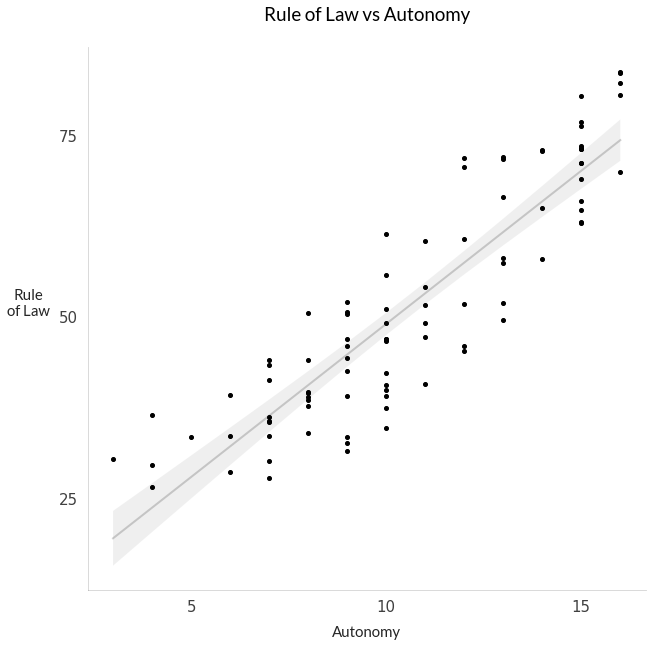

In [6]:
f = scatterplot(df["per_auto"], 
              df["RoLScore"], 
              "Rule of Law vs Autonomy", 
              "Autonomy", 
              "Rule of Law")

In [7]:
f.savefig("scatterplot2.svg", format="svg")